In [ ]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# APEX Gun 

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6,6)
%config InlineBackend.figure_format = 'retina'

In [3]:
from distgen import Generator

gen = Generator('distgen_laser.yaml')
gen['n_particle'] = 100000
gen

<disgten.Generator with input: 
n_particle: 100000
random_type: hammersley
start:
  MTE:
    units: meV
    value: 250
  type: cathode
t_dist:
  avg_t:
    units: ps
    value: 0
  n_sigma_cutoff: 3
  sigma_t:
    units: ps
    value: 8.5
  type: gaussian
total_charge:
  units: pC
  value: 10
xy_dist:
  file: 2019_11_04_135614reg_out.txt
  type: file2d

>

In [4]:
gen.run()
gen.particles

<ParticleGroup with 100000 particles at 0x7fed3a735390>

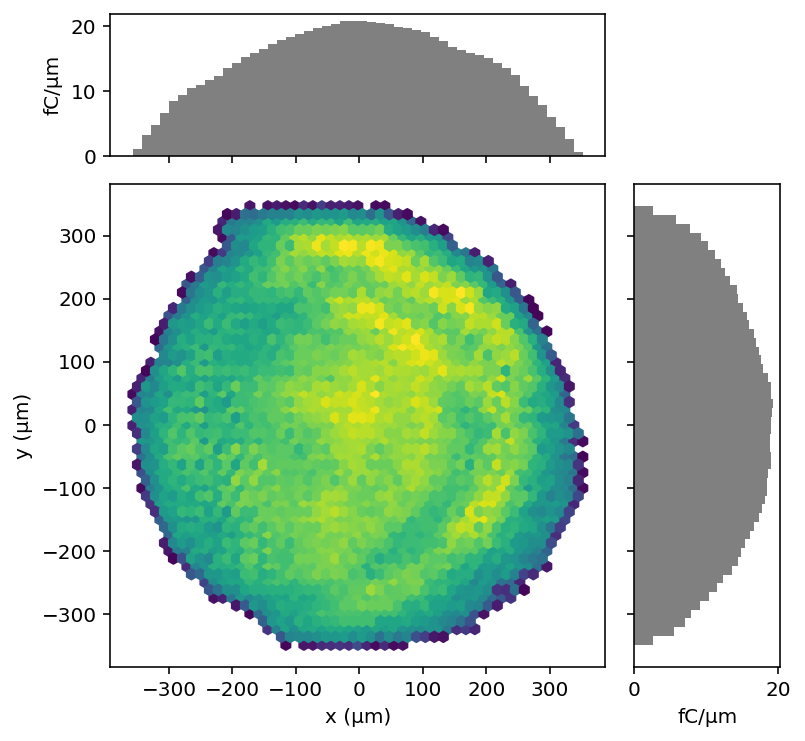

In [5]:
gen.particles.plot('x', 'y', bins=50)

In [6]:
from gpt import GPT

In [7]:
G = GPT('gpt.in', initial_particles=gen.particles)
G.set_variables({'gun_peak_field':20e6, 'gun_phase':171.340, 'tmax': 4e-7, 'RadiusMax':.015,
                  'Ntout':100, 'dtmin':0, 'GBacc':6.5, 'xacc':6.5, 'space_charge':0, 'BSOL':0.057});

In [8]:
G.run(gpt_verbose=True)

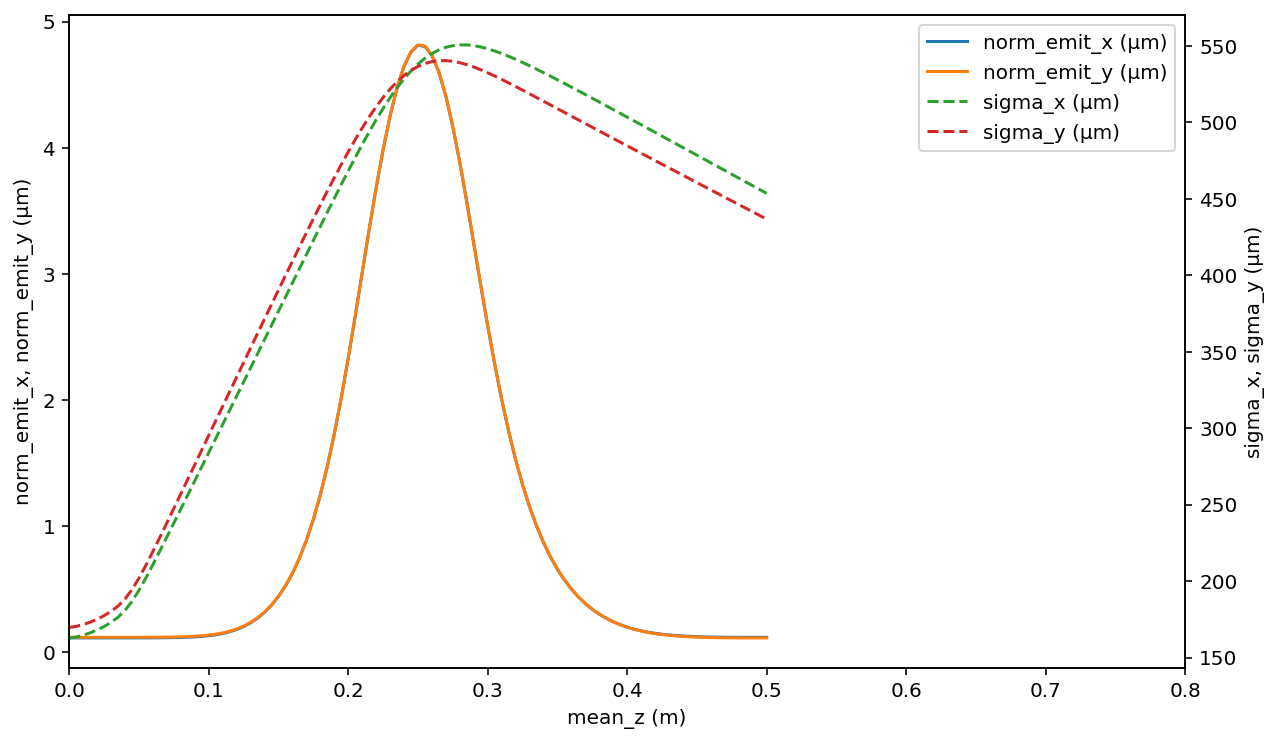

In [9]:
G.plot(y=['norm_emit_x', 'norm_emit_y'], y2=['sigma_x', 'sigma_y'], xlim=(0,0.8), figsize=(10,6))

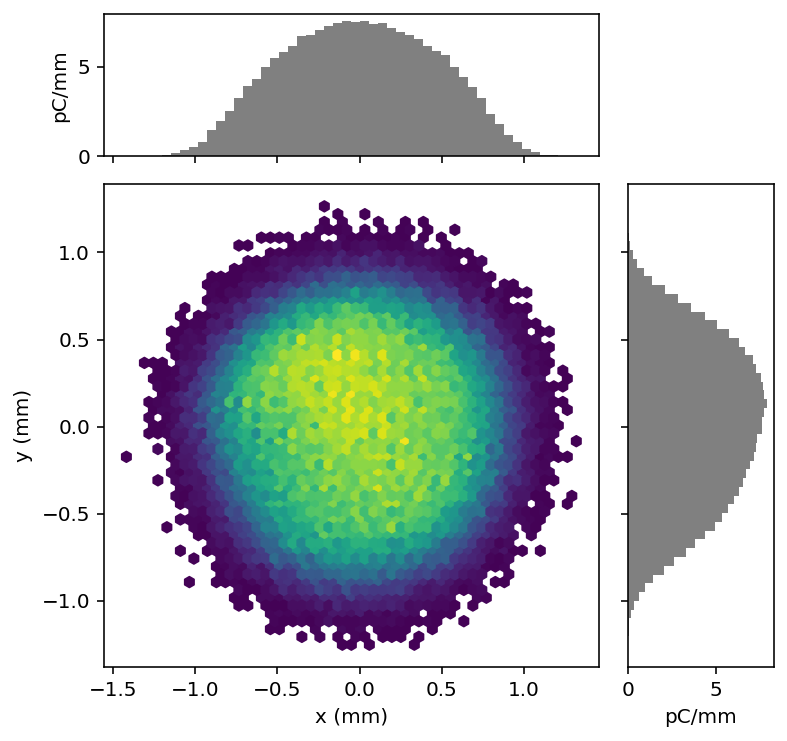

In [10]:
G.particles[-1].plot('x', 'y', bins=50)

In [11]:
G.archive()

'gpt_11460af5d7055532fd45ccc2935c06bd.h5'

In [12]:
!rm *h5